In [6]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 14 19:06:51 2024

@author: mkost
"""

from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from ParametersB_SIR import *
from matplotlib.lines import Line2D

#import animation
ts=0.1
timesteps_cut=int(deltat*(timesteps-1)/ts)

# explicit injection and reaction

DiscreteSusAverage = np.load('./Solutions/SusAverageExplicitB.npy')
DiscreteInfAverage = np.load('./Solutions/InfAverageExplicitB.npy')
DiscreteRecAverage = np.load('./Solutions/RecAverageExplicitB.npy')

# tau injection, tau reaction

DiscreteSusAverageTau = np.load('./Solutions/SusAverageImplicitB.npy')
DiscreteInfAverageTau = np.load('./Solutions/InfAverageImplicitB.npy')
DiscreteRecAverageTau = np.load('./Solutions/RecAverageImplicitB.npy')


TimeExact=0
TimeTau=0


'''Plotting'''

def HybridPlot(Average, Reference, bd):
    '''
    Creates hybrid plots, where the right side corresponds to the FD solution
    and the left side to the mean-field concentration obtained from the coupling.
    Average=mean-field concentration
    Concentration=FD solution
    bd=location of the boundary
    '''

    listH = []  # list of Hybrid solutions
    listR = []  # list of Reference solutions
    
    
    Hmean=np.zeros(timesteps_cut)
    Cmean=np.zeros(timesteps_cut)
    L2Error=np.zeros(timesteps_cut)
    if len(Average)!=timesteps_cut:
        print('error')
        
    for t in range(timesteps_cut):
        Average_t = np.transpose(Average[t])  # get reservoir
        
        
        # create matrix fromt he particle discretization
        Particle = np.zeros(shape=(l_coupling, int(l_coupling/2)))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
        # average
        Hmean[t]=np.mean(Particle)
    
   
    constant=int(ts/deltat)
    for t in range(timesteps_cut):      
        Ref_t=Reference[(t+1)*constant]
        Concentration_t= np.zeros(shape=(l_coupling, int(l_coupling/2)))
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2)):
                 Concentration_t[i, j  ]=Ref_t[i,j]
        
        Cmean[t]=np.mean(Concentration_t)

        Average_t = np.transpose(Average[t])  # get reservoir
            
            
        # create matrix from the particle discretization
        Particle = np.zeros(shape=(l_coupling, int(l_coupling/2)))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
        # calculate normalized L2 error    
        L2Error[t]=np.linalg.norm(Particle/np.max(Concentration_t)-Concentration_t/np.max(Concentration_t)) 

    return Hmean, Cmean, L2Error 

# load reference solution

ReferenceSus = np.load('./Solutions/FDSIR1_B.npy')
ReferenceInf = np.load('./Solutions/FDSIR2_B.npy')
ReferenceRec = np.load('./Solutions/FDSIR3_B.npy')



#%% Generate Plot 

sus_mean, RefS, error_sus = HybridPlot(DiscreteSusAverage, ReferenceSus, l_coupling)
inf_mean, RefI, error_inf= HybridPlot(DiscreteInfAverage,  ReferenceInf, l_coupling)
rec_mean, RefR, error_rec = HybridPlot(DiscreteRecAverage, ReferenceRec, l_coupling)

#%% Generate Plot 

sus_meanTau, RefS, error_sus_tau = HybridPlot(DiscreteSusAverageTau, ReferenceSus, l_coupling)
inf_meanTau, RefI, error_inf_tau= HybridPlot(DiscreteInfAverageTau,  ReferenceInf, l_coupling)
rec_meanTau, RefR, error_rec_tau = HybridPlot(DiscreteRecAverageTau, ReferenceRec, l_coupling)





#%%


(15,) [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


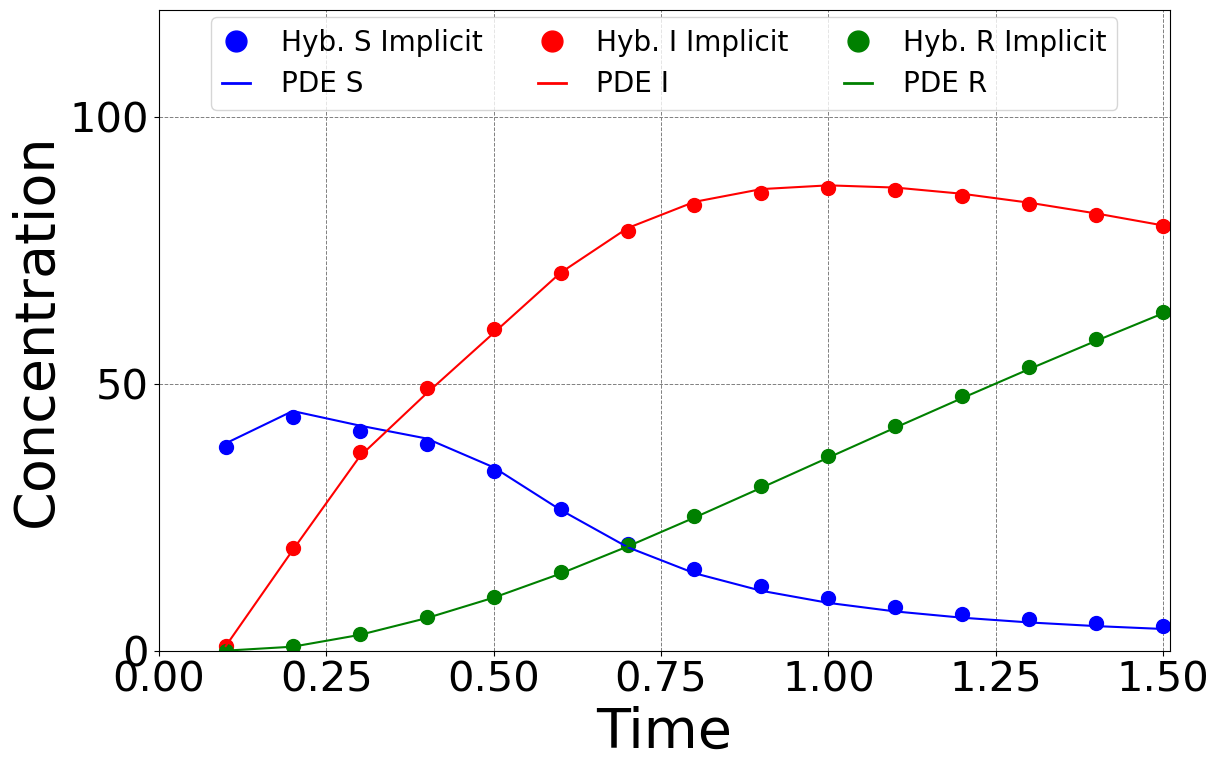

In [2]:
# plot data
Times=np.round(np.arange(ts, maxtime+ts, ts), 15) # if I start with 0 and save every ts
print(np.shape(Times), Times)
plt.figure(figsize=(12.3, 7.8))

#plt.plot(Times, sus_mean, 'x', markersize=20, label='S', color='blue')
#plt.plot(Times, inf_mean, 'x', markersize=20, label='I', color='red')
#plt.plot(Times, rec_mean, 'x', markersize=20, label='R', color='green')

plt.plot(Times, sus_meanTau, 'o', markersize=10, label='S Tau', color='blue')
plt.plot(Times, inf_meanTau, 'o', markersize=10, label='I Tau', color='red')
plt.plot(Times, rec_meanTau, 'o', markersize=10, label='R Tau', color='green')

plt.plot(Times, RefS, color='blue')
plt.plot(Times, RefI, color='red')
plt.plot(Times, RefR, color='green')

# Set x-axis ticks to be integers only
xticks = [0, 0.25,0.5,0.75, 1, 1.25, 1.5] # Adjust according to your data limits
plt.xticks(xticks, fontsize=30)

# Set y-axis ticks to be integers only
yticks = range(0,150, 50)  # Adjust based on your y-axis limits
#yticks = range(0,30, 5)  # Adjust based on your y-axis limits
plt.yticks(yticks, fontsize=30)

plt.ylim(0, 120)
#plt.ylim(0, 30)
plt.xlim(0, 1.51)

plt.xlabel('Time', fontsize=40)
plt.ylabel('Concentration', fontsize=40)

# Create custom legend handles for dots and lines
#sus_dot = Line2D([], [], color='blue', marker='x', linestyle='None', markersize=15, label='Hyb. S')
sus_dotTau = Line2D([], [], color='blue', marker='o', linestyle='None', markersize=15, label='Hyb. S Implicit')
sus_line = Line2D([], [], color='blue', linestyle='-', linewidth=2, label='PDE S')

#inf_dot = Line2D([], [], color='red', marker='x', linestyle='None', markersize=15, label='Hyb. I')
inf_dotTau = Line2D([], [], color='red', marker='o', linestyle='None', markersize=15, label='Hyb. I Implicit')
inf_line = Line2D([], [], color='red', linestyle='-', linewidth=2, label='PDE I')

#rec_dot = Line2D([], [], color='green', marker='x', linestyle='None', markersize=15, label='Hyb. R')
rec_dotTau = Line2D([], [], color='green', marker='o', linestyle='None', markersize=15, label='Hyb. R Implicit')
rec_line = Line2D([], [], color='green', linestyle='-', linewidth=2, label='PDE R')

# Combine all custom legend handles
handles = [sus_dotTau , sus_line, inf_dotTau, inf_line ,rec_dotTau,rec_line]
plt.legend(handles=handles, fontsize=20, handlelength=1, handletextpad=1.1, 
           loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=3)
plt.grid(which='both', linestyle='--', linewidth=0.7, color='gray')  # Customize as needed

plt.tight_layout()



plt.savefig('./Plots/Implicit/SIRConcentrationB.png')


(15,) [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


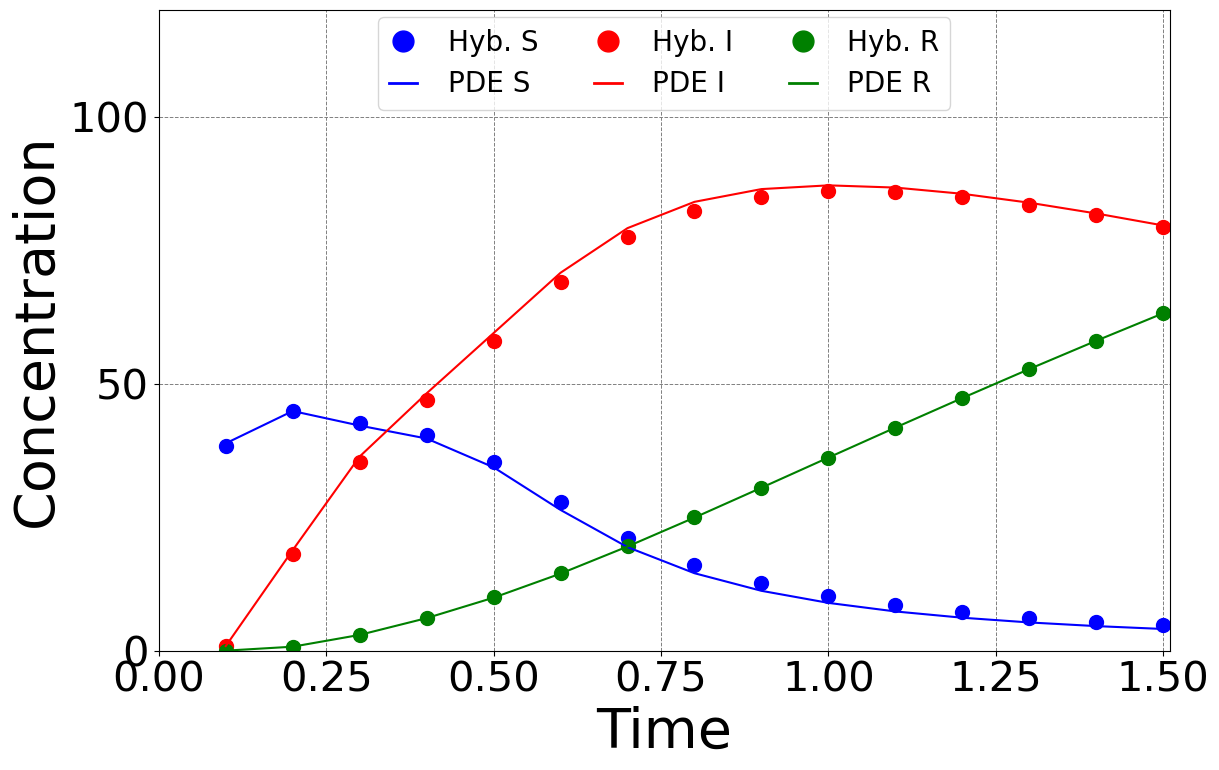

In [8]:
# plot data
Times=np.round(np.arange(ts, maxtime+ts, ts), 15) # if I start with 0 and save every ts
print(np.shape(Times), Times)
plt.figure(figsize=(12.3, 7.8))

plt.plot(Times, sus_mean, 'o', markersize=10, label='S', color='blue')
plt.plot(Times, inf_mean, 'o', markersize=10, label='I', color='red')
plt.plot(Times, rec_mean, 'o', markersize=10, label='R', color='green')

plt.plot(Times, RefS, color='blue')
plt.plot(Times, RefI, color='red')
plt.plot(Times, RefR, color='green')

# Set x-axis ticks to be integers only
xticks = [0, 0.25,0.5,0.75, 1, 1.25, 1.5] # Adjust according to your data limits
plt.xticks(xticks, fontsize=30)

# Set y-axis ticks to be integers only
yticks = range(0,150, 50)  # Adjust based on your y-axis limits
#yticks = range(0,30, 5)  # Adjust based on your y-axis limits
plt.yticks(yticks, fontsize=30)

plt.ylim(0, 120)
#plt.ylim(0, 30)
plt.xlim(0, 1.51)

plt.xlabel('Time', fontsize=40)
plt.ylabel('Concentration', fontsize=40)

# Create custom legend handles for dots and lines
sus_dot = Line2D([], [], color='blue', marker='o', linestyle='None', markersize=15, label='Hyb. S')

sus_line = Line2D([], [], color='blue', linestyle='-', linewidth=2, label='PDE S')

inf_dot = Line2D([], [], color='red', marker='o', linestyle='None', markersize=15, label='Hyb. I')
inf_line = Line2D([], [], color='red', linestyle='-', linewidth=2, label='PDE I')

rec_dot = Line2D([], [], color='green', marker='o', linestyle='None', markersize=15, label='Hyb. R')
rec_line = Line2D([], [], color='green', linestyle='-', linewidth=2, label='PDE R')

# Combine all custom legend handles
handles = [sus_dot , sus_line, inf_dot, inf_line ,rec_dot,rec_line]
plt.legend(handles=handles, fontsize=20, handlelength=1, handletextpad=1.1, 
           loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=3)
plt.grid(which='both', linestyle='--', linewidth=0.7, color='gray')  # Customize as needed

plt.tight_layout()



plt.savefig('./Plots/Explicit/SIRConcentrationB.png')

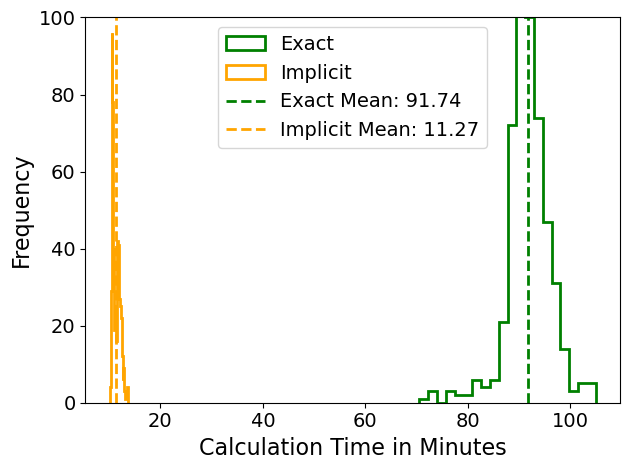

In [4]:
TimeExactList=[]
TimeImplicitList=[]

sim=500
for s in range(sim):
    TimeExact=np.load('/home/htc/bzfkostr/SCRATCH/SimulationsMultiscale/SIR_timeExplicitCutB'+str(s)+'.npy')
    TimeImplicit=np.load('/home/htc/bzfkostr/SCRATCH/SimulationsMultiscale/SIR_timeImplicitCutB'+str(s)+'.npy')   # with tau injection and reaction
    #TimeTau=np.load('/home/htc/bzfkostr/SCRATCH/SimulationsMultiscale/SIR_timeTauCutB'+str(s)+'.npy') # with exlicit injection
    
    TimeExactList.append(TimeExact/60)
    TimeImplicitList.append(TimeImplicit/60)

mean_exact=np.mean(TimeExactList)
mean_implicit=np.mean(TimeImplicitList)
fig = plt.figure()
plt.ylim(0, 100)
#plt.xlim(20, 40)
# Plot the histograms
plt.hist(TimeExactList, bins=20,histtype='step', linewidth=2, color='green', label='Exact')
plt.hist(TimeImplicitList, bins=20, histtype='step', linewidth=2, color='orange', label='Implicit')

# Plot vertical lines for mean values
plt.axvline(mean_exact, color='green', linestyle='--', linewidth=2, label=f'Exact Mean: {mean_exact:.2f}')
plt.axvline(mean_implicit, color='orange', linestyle='--', linewidth=2, label=f'Implicit Mean: {mean_implicit:.2f}')

# Set larger font sizes
plt.xlabel('Calculation Time in Minutes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=14)

# Set larger tick sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the plot with a larger layout
plt.tight_layout()  # Adjusts spacing to prevent labels from being cut off
plt.savefig('./Plots/Implicit/TimeComparisonBImplicit.png')

